# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from citipy import citipy
from pprint import pprint
from api_keys import api_key


# Import API key
from api_keys import api_key
from citipy import citipy

# Output File (CSV)
output_file = "output_data/cities.csv"
temp_units = "imperial"


#url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
# list - dataframe
city2 = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops draft
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city2.append(city)
        else:
            count_one += 1
            city2.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skip...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | solnechnyy
Processing Record 5 of Set 1 | mahibadhoo
Processing Record 6 of Set 1 | padang
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | adrar
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | forst
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | suhbaatar
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | perth
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | port elizabeth
City not found. Skip...
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | souillac
City not found. Skip...
Processing Record 23 of Set 1 | abha
Processing Rec

Processing Record 40 of Set 4 | sisimiut
Processing Record 41 of Set 4 | zhigansk
Processing Record 42 of Set 4 | totma
Processing Record 43 of Set 4 | khor
Processing Record 44 of Set 4 | brewster
Processing Record 45 of Set 4 | ahipara
Processing Record 46 of Set 4 | kemin
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | sangar
City not found. Skip...
Processing Record 49 of Set 4 | ponta delgada
Processing Record 1 of Set 5 | lorengau
Processing Record 2 of Set 5 | belaya gora
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | ryotsu
Processing Record 5 of Set 5 | aksu
Processing Record 6 of Set 5 | smithers
Processing Record 7 of Set 5 | chokurdakh
Processing Record 8 of Set 5 | sibanicu
Processing Record 9 of Set 5 | griffin
Processing Record 10 of Set 5 | sitka
City not found. Skip...
Processing Record 11 of Set 5 | georgetown
Processing Record 12 of Set 5 | taksimo
Processing Record 13 of Set 5 | uribia
City not found. Skip...
Processing 

Processing Record 27 of Set 8 | agadir
Processing Record 28 of Set 8 | nemuro
Processing Record 29 of Set 8 | san cristobal
Processing Record 30 of Set 8 | kholmogory
Processing Record 31 of Set 8 | pisek
Processing Record 32 of Set 8 | kaitangata
Processing Record 33 of Set 8 | guerrero negro
Processing Record 34 of Set 8 | beeville
Processing Record 35 of Set 8 | iralaya
Processing Record 36 of Set 8 | plettenberg bay
City not found. Skip...
City not found. Skip...
Processing Record 37 of Set 8 | novoagansk
Processing Record 38 of Set 8 | grand gaube
Processing Record 39 of Set 8 | mount pleasant
Processing Record 40 of Set 8 | flinders
Processing Record 41 of Set 8 | chicama
Processing Record 42 of Set 8 | ayan
Processing Record 43 of Set 8 | dzhebariki-khaya
Processing Record 44 of Set 8 | loralai
Processing Record 45 of Set 8 | seoul
Processing Record 46 of Set 8 | hirara
Processing Record 47 of Set 8 | honiara
Processing Record 48 of Set 8 | poso
Processing Record 49 of Set 8 | m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
weather_dict = {
    "City":city2,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,100,RU,1566685675,93,50.68,156.12,47.72,31.32
1,jamestown,2,AU,1566685080,94,-33.21,138.60,37.10,3.44
2,longyearbyen,75,NO,1566685114,80,78.22,15.63,39.20,8.05
3,solnechnyy,100,RU,1566685106,98,50.72,136.64,51.86,2.89
4,mahibadhoo,100,MV,1566685676,74,3.78,72.97,81.92,10.54


In [52]:
weather_df.to_csv("Output/weather_df_csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,100,RU,1566685675,93,50.68,156.12,47.72,31.32
1,jamestown,2,AU,1566685080,94,-33.21,138.60,37.10,3.44
2,longyearbyen,75,NO,1566685114,80,78.22,15.63,39.20,8.05
3,solnechnyy,100,RU,1566685106,98,50.72,136.64,51.86,2.89
4,mahibadhoo,100,MV,1566685676,74,3.78,72.97,81.92,10.54


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

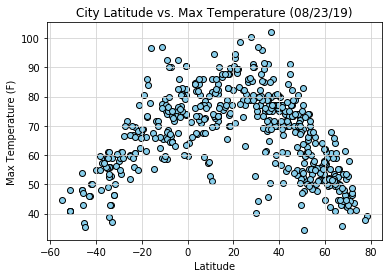

In [53]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (08/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Humidity Plot

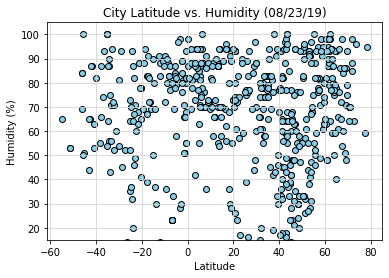

In [54]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (08/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Cloudiness Plot

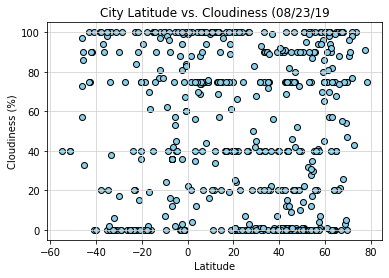

In [55]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (08/23/19")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Wind Speed Plot

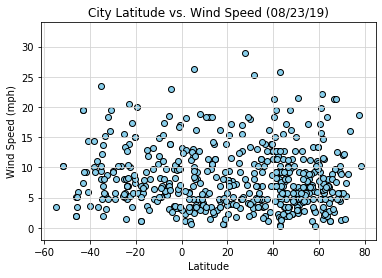

In [56]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (08/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()